# Imports

In [1]:
# Standard imports
import autograd.numpy as ag_np
import matplotlib.pyplot as plt
import pandas as pd
import os

/var/folders/tm/myf2gb1j4bldm_rk381cx4t00000gn/T/ipykernel_9236/2623464416.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Importing our own code
from CollabFilterOneVectorPerItem import CollabFilterOneVectorPerItem
from train_valid_test_loader import load_train_valid_test_datasets

# Load the Dataset

In [3]:
train_tuple, valid_tuple, test_tuple, n_users, n_items = load_train_valid_test_datasets()

### Structure of the dataset

Each dataset *split* (train or valid or test) is represented as a *tuple* of 3 values:

* a 1D array of user_ids
* a 1D array of item_ids
* a 1D array of ratings

In [4]:
n_train_examples = len(train_tuple[0])
N = n_train_examples

# Unpack the tuple into its three contained arrays
userids_tr_N = train_tuple[0]
itemids_tr_N = train_tuple[1]
ratings_tr_N = train_tuple[2]

n_validation_examples = len(valid_tuple[0])
M = n_validation_examples
userids_va_M = valid_tuple[0]
itemids_va_M = valid_tuple[1]
ratings_va_M = valid_tuple[2]

n_test_examples = len(test_tuple[0])
T = n_test_examples

In [5]:
test_tuple

(array([772, 471, 641, ..., 926, 522, 788]),
 array([ 36, 228, 401, ...,  94, 547, 247]),
 array([3, 5, 4, ..., 5, 4, 3]))

### Print first 5 values in each array

We should see that:

* user 662 gave movie 761 a 5
* user 298 gave movie 90 a 4
* user 90 gave movie 349 a 4
* user 912 gave movie 917 a 4
* user 302 gave movie 42 a 3

In [6]:
print(userids_tr_N[:5])
print(itemids_tr_N[:5])
print(ratings_tr_N[:5])

[662 298  90 912 302]
[761  90 349 917  42]
[5 4 4 4 3]


### Load Movie Info

In [7]:
DATA_PATH = 'data_movie_lens_100k'

In [8]:
movie_df = pd.read_csv(os.path.join(DATA_PATH, 'movie_info.csv'))

In [9]:
movie_df.head()

,item_id,title,release_year,orig_item_id
0,0,Toy Story (1995),1995,1
1,1,GoldenEye (1995),1995,2
2,2,Four Rooms (1995),1995,3
3,3,Get Shorty (1995),1995,4
4,4,Copycat (1995),1995,5


### Load User Info

In [10]:
user_df = pd.read_csv(os.path.join(DATA_PATH, 'user_info.csv'))

In [11]:
user_df.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


# Problem 1 - Analysis Tasks

# Step 3(i)

In [12]:
batch_size = 1000 # Fix batch size for all of problem 1
random_state = 42 # fix random state for reproducibility

epoch       0.000 | loss_total     0.47600 | tr RMSE     1.24455 | va RMSE     1.24854 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.54899 | tr RMSE     1.24454 | va RMSE     1.24853 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.62098 | tr RMSE     1.24454 | va RMSE     1.24853 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.52797 | tr RMSE     1.24454 | va RMSE     1.24852 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.56691 | tr RMSE     1.24451 | va RMSE  

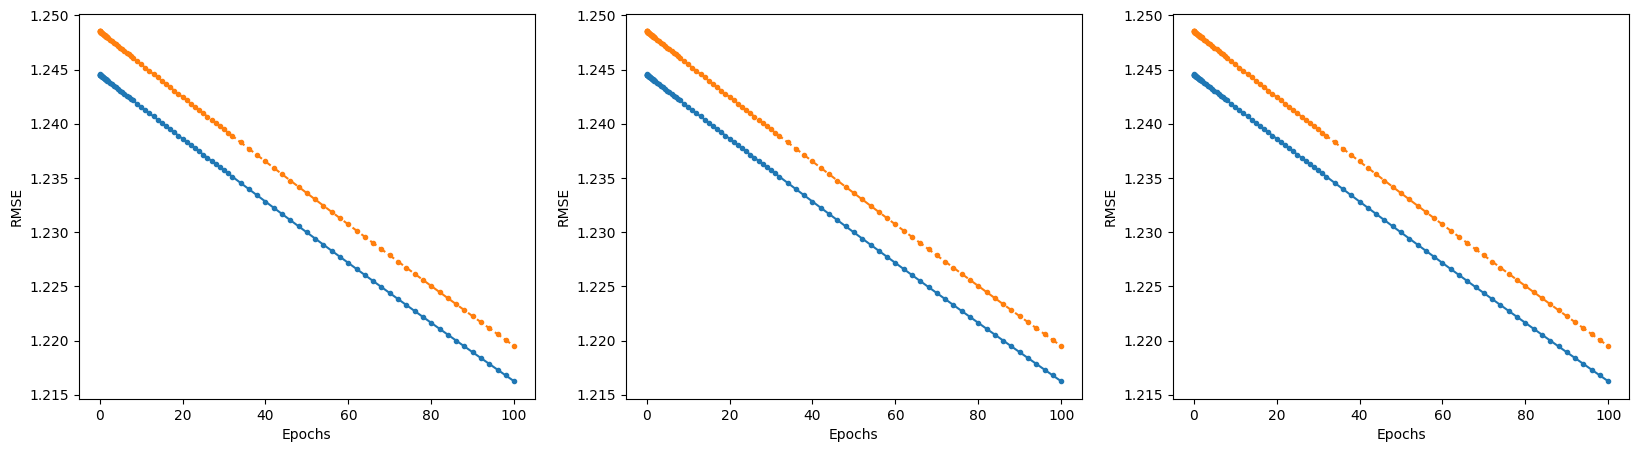

In [27]:
# Step 3(i)
# With no regularization (alpha=0) train a CollabFilterOneVectorPerItem using SGD.
# Try three possible values of K: 2, 10, and 50

kValues = [2, 10, 50]

epoch_rmse_tuples = []
for k in kValues:
    model = CollabFilterOneVectorPerItem(n_factors=k, alpha=0, batch_size=1000, step_size=.00001)
    train_data_tuple = (userids_tr_N, itemids_tr_N, ratings_tr_N)
    #valid_data_tuple = (userids_va_M, itemids_va_M, ratings_va_M)
    model.init_parameter_dict(n_users=n_users, n_items=n_items, train_tuple=train_data_tuple)
    model.fit(train_data_tuple, valid_tuple)
    epoch_rmse_tuples.append((model.trace_epoch, model.trace_rmse_train, model.trace_rmse_valid))
    
# TODO: implement
figure, axes = plt.subplots(1, 3, figsize=(20, 5))
for i, (epoch, train_rmse, valid_rmse) in enumerate(epoch_rmse_tuples):
    axe = axes[i]
    axe.plot(epoch, train_rmse, '.-', label='train RMSE')
    axe.plot(epoch, valid_rmse, '.--', label='valid RMSE')
    axe.set_xlabel("Epochs")
    axe.set_ylabel("RMSE")

plt.show()

# TODO: implement

In [ ]:
#print(len(epoch_rmse_tuples))
#print(epoch_rmse_tuples[0] == epoch_rmse_tuples[1])

3
False


epoch       0.000 | loss_total     0.46701 | tr RMSE     1.24455 | va RMSE     1.24854 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.014 | loss_total     0.51400 | tr RMSE     1.24454 | va RMSE     1.24853 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.029 | loss_total     0.50899 | tr RMSE     1.24454 | va RMSE     1.24853 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.043 | loss_total     0.59098 | tr RMSE     1.24454 | va RMSE     1.24852 | grad_wrt_mu     1.00000 | grad_wrt_b_per_user     0.00106 | grad_wrt_c_per_item     0.00059 | grad_wrt_U     0.00000 | grad_wrt_V     0.00000
epoch       0.129 | loss_total     0.58892 | tr RMSE     1.24451 | va RMSE  

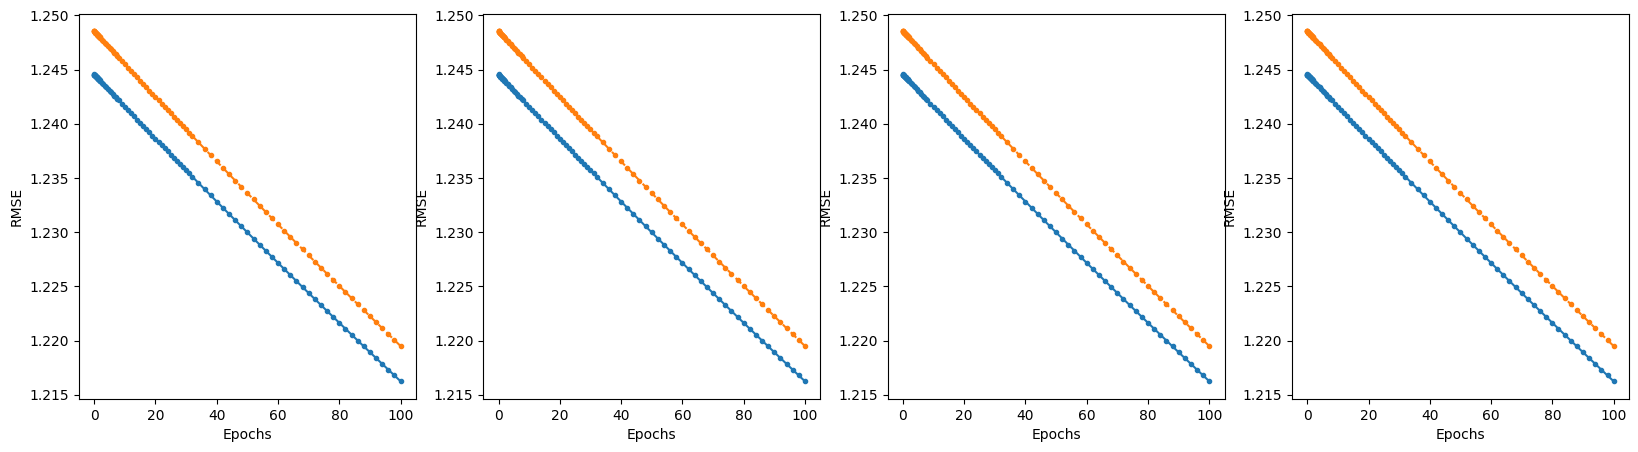

In [32]:
aValues = [.1, .01, .001, .0001]

epoch_rmse_tuples2 = []
for a in aValues:
    model = CollabFilterOneVectorPerItem(n_factors=50, alpha=a, batch_size=1000, step_size=.00001)
    train_data_tuple = (userids_tr_N, itemids_tr_N, ratings_tr_N)
    #valid_data_tuple = (userids_va_M, itemids_va_M, ratings_va_M)
    model.init_parameter_dict(n_users=n_users, n_items=n_items, train_tuple=train_data_tuple)
    model.fit(train_data_tuple, valid_tuple)
    epoch_rmse_tuples2.append((model.trace_epoch, model.trace_rmse_train, model.trace_rmse_valid))
    
# TODO: implement
figure, axes = plt.subplots(1, 4, figsize=(20, 5))
for i, (epoch, train_rmse, valid_rmse) in enumerate(epoch_rmse_tuples2):
    axe = axes[i]
    axe.plot(epoch, train_rmse, '.-', label='train RMSE')
    axe.plot(epoch, valid_rmse, '.--', label='valid RMSE')
    axe.set_xlabel("Epochs")
    axe.set_ylabel("RMSE")

plt.show()


# Step 3(ii)

In [ ]:
# Step 3(ii)
# Train with K = 50 now with moderate regularization by setting strength alpha > 0 
# to try to eliminate overfitting you saw in 3(i)
# Focus only on K = 50

K = 50
alpha = 0.25
model = CollabFilterOneVectorPerItem(
    n_epochs=200, batch_size=batch_size, step_size=0.5, n_factors=K, alpha=alpha, random_state=random_state
)
model.init_parameter_dict(n_users, n_items, train_tuple)
model.fit(train_tuple, valid_tuple)

epoch       0.000 | loss_total    94.04307 | tr RMSE     7.87376 | va RMSE     7.83146 | grad_wrt_mu     5.32992 | grad_wrt_b_per_user     0.00994 | grad_wrt_c_per_item     0.00563 | grad_wrt_U     0.00811 | grad_wrt_V     0.00493
epoch       0.014 | loss_total    83.86753 | tr RMSE     7.27755 | va RMSE     7.24485 | grad_wrt_mu     1.08208 | grad_wrt_b_per_user     0.00778 | grad_wrt_c_per_item     0.00470 | grad_wrt_U     0.00748 | grad_wrt_V     0.00444
epoch       0.029 | loss_total    81.55096 | tr RMSE     7.24213 | va RMSE     7.21896 | grad_wrt_mu     1.15409 | grad_wrt_b_per_user     0.00795 | grad_wrt_c_per_item     0.00481 | grad_wrt_U     0.00711 | grad_wrt_V     0.00442
epoch       0.043 | loss_total    83.50588 | tr RMSE     7.20416 | va RMSE     7.18997 | grad_wrt_mu     0.44186 | grad_wrt_b_per_user     0.00817 | grad_wrt_c_per_item     0.00487 | grad_wrt_U     0.00736 | grad_wrt_V     0.00457
epoch       0.129 | loss_total    79.14256 | tr RMSE     6.97317 | va RMSE  

epoch      13.000 | loss_total    17.95636 | tr RMSE     1.33540 | va RMSE     2.31515 | grad_wrt_mu     0.09929 | grad_wrt_b_per_user     0.00163 | grad_wrt_c_per_item     0.00090 | grad_wrt_U     0.00091 | grad_wrt_V     0.00062
epoch      14.000 | loss_total    17.15579 | tr RMSE     1.27145 | va RMSE     2.22748 | grad_wrt_mu     0.03062 | grad_wrt_b_per_user     0.00152 | grad_wrt_c_per_item     0.00088 | grad_wrt_U     0.00087 | grad_wrt_V     0.00060
epoch      15.000 | loss_total    16.41295 | tr RMSE     1.21798 | va RMSE     2.14846 | grad_wrt_mu     0.05047 | grad_wrt_b_per_user     0.00140 | grad_wrt_c_per_item     0.00085 | grad_wrt_U     0.00080 | grad_wrt_V     0.00056
epoch      16.000 | loss_total    15.73094 | tr RMSE     1.16842 | va RMSE     2.07469 | grad_wrt_mu     0.07136 | grad_wrt_b_per_user     0.00137 | grad_wrt_c_per_item     0.00081 | grad_wrt_U     0.00078 | grad_wrt_V     0.00054
epoch      17.000 | loss_total    15.09334 | tr RMSE     1.12644 | va RMSE  

epoch      66.000 | loss_total     3.21689 | tr RMSE     0.79474 | va RMSE     1.04279 | grad_wrt_mu     0.02932 | grad_wrt_b_per_user     0.00086 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00024 | grad_wrt_V     0.00019
epoch      68.000 | loss_total     3.05971 | tr RMSE     0.79592 | va RMSE     1.03546 | grad_wrt_mu     0.03102 | grad_wrt_b_per_user     0.00087 | grad_wrt_c_per_item     0.00054 | grad_wrt_U     0.00023 | grad_wrt_V     0.00018
epoch      70.000 | loss_total     2.91150 | tr RMSE     0.79769 | va RMSE     1.02915 | grad_wrt_mu     0.06169 | grad_wrt_b_per_user     0.00092 | grad_wrt_c_per_item     0.00051 | grad_wrt_U     0.00022 | grad_wrt_V     0.00018
epoch      72.000 | loss_total     2.77363 | tr RMSE     0.79743 | va RMSE     1.02259 | grad_wrt_mu     0.10150 | grad_wrt_b_per_user     0.00089 | grad_wrt_c_per_item     0.00053 | grad_wrt_U     0.00022 | grad_wrt_V     0.00017
epoch      74.000 | loss_total     2.64452 | tr RMSE     0.79900 | va RMSE  

epoch     148.000 | loss_total     0.99211 | tr RMSE     0.83187 | va RMSE     0.94722 | grad_wrt_mu     0.00092 | grad_wrt_b_per_user     0.00094 | grad_wrt_c_per_item     0.00055 | grad_wrt_U     0.00011 | grad_wrt_V     0.00008
epoch     152.000 | loss_total     0.97349 | tr RMSE     0.83369 | va RMSE     0.94648 | grad_wrt_mu     0.05162 | grad_wrt_b_per_user     0.00099 | grad_wrt_c_per_item     0.00057 | grad_wrt_U     0.00012 | grad_wrt_V     0.00008
epoch     156.000 | loss_total     0.95506 | tr RMSE     0.83376 | va RMSE     0.94510 | grad_wrt_mu     0.08912 | grad_wrt_b_per_user     0.00095 | grad_wrt_c_per_item     0.00052 | grad_wrt_U     0.00010 | grad_wrt_V     0.00008
epoch     160.000 | loss_total     0.94051 | tr RMSE     0.83434 | va RMSE     0.94406 | grad_wrt_mu     0.07285 | grad_wrt_b_per_user     0.00093 | grad_wrt_c_per_item     0.00056 | grad_wrt_U     0.00010 | grad_wrt_V     0.00008
epoch     164.000 | loss_total     0.92755 | tr RMSE     0.83510 | va RMSE  

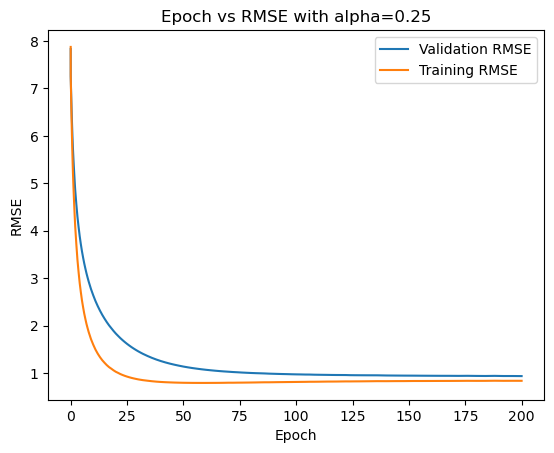

Training RMSE: 0.8378727600851046
Validation RMSE: 0.9370179371499652


In [ ]:
plt.plot(model.trace_epoch, model.trace_rmse_valid, label="Validation RMSE")
plt.plot(model.trace_epoch, model.trace_rmse_train, label="Training RMSE")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.title(f"Epoch vs RMSE with alpha={alpha}")
plt.legend()
plt.show()

print(f"Training RMSE: {model.trace_rmse_train[-1]}")
print(f"Validation RMSE: {model.trace_rmse_valid[-1]}")

In [ ]:
# Save the parameters for later so we don't need to retrain
import pickle
with open('problem1bparams.pkl', 'wb') as f:
    pickle.dump(model.param_dict, f)

In [ ]:
# For the best run at each K (with/without alpha > 0), please record that model's:
# - RMSE and MAE on the validation set
# - RMSE and MAE on the test set
# - Value of parameters mu, b, c, u, v (not needed for the report, but useful to save for later)

# You likely need to adjust the SGD step_size or n_epochs hyperparameter here. You should aim to show runs that last 
# until either training error visibly converges or until you see obvious overfitting.

# Hint: If you do see overfitting, you might consider using early stopping (by monitoring the validation set performance)
# to get the best possible model for each step above. 
# Note that optimization contains randomness, both from the initialization and from the minibatch sampling in SGD,
# but by controlling the random state you can allow your optimization to be reproducible

# TODO: implement

Next, do the report tasks:

1a) Figure and caption: RMSE vs epoch with alpha=0. 3 figures side by side, with K=2,10,50
    - Each panel should show two lines, one for train RMSE and one for validation RMSE

1b) Figure and caption: RMSE vs epoch with alpha > 0

1c) Table and caption: Report the RMSE and MAE for train, validation, and test sets for the best version of each of these latent factor models (one per row):
    - LF with K=2
    - LF with K=10
    - LF with K=50 with alpha=0
    - LF with K=50 with alpha>0

1d) Figure and caption

# Problem 2